In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('ex2data1.txt',header=None,sep = ",")
df.columns = ['exam-score-1','exam-score-2','admitted']
df.head()

,exam-score-1,exam-score-2,admitted
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


## Logistic Regression

1. Build Model
2. Evaluate (Accuracy)
3. Build Model (Regularized)
4. Evaluate (Accuracy)
5. Plot Decision Boundry

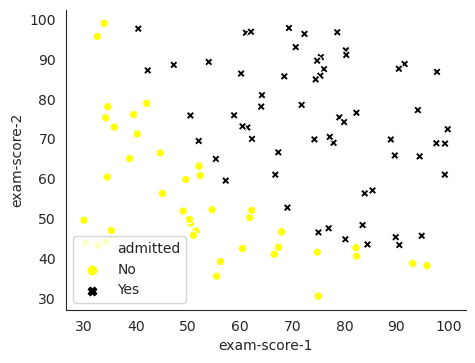

In [3]:
sns.set_style('white')
fig = plt.figure(dpi = 100,figsize=(4,3))
ax = fig.add_axes([1,1,1,1])

df_temp = df.copy()
df_temp['admitted'] = df_temp['admitted'].replace({0:'No',1:'Yes'})
sns.scatterplot(x = 'exam-score-1',y='exam-score-2',hue = 'admitted',
                data = df_temp, ax = ax,style = 'admitted',palette=['yellow','black'])
sns.despine(right = True)
ax.legend(loc = 0);

In [4]:
x = df.iloc[:,:-1].values
y = df.iloc[:,-1].values
print(x.shape)
print(y.shape)

(100, 2)
(100,)


In [5]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.20)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(80, 2)
(80,)
(20, 2)
(20,)


In [6]:
from sklearn.linear_model import LogisticRegression

In [7]:
model_lr = LogisticRegression(penalty='none')

In [8]:
model_lr.fit(x_train,y_train)

LogisticRegression(penalty='none')

In [9]:
model_lr.score(x_train,y_train)

0.9

In [10]:
model_lr.score(x_test,y_test)

0.85

### Regularised LR

In [11]:
model_lr_reg = LogisticRegression(penalty='l2',C=10,max_iter=1000)

In [12]:
model_lr_reg.fit(x_train,y_train)

LogisticRegression(C=10, max_iter=1000)

In [13]:
model_lr_reg.score(x_train,y_train)

0.9

In [14]:
model_lr_reg.score(x_test,y_test)

0.85

### Decision Boundry

In [15]:
from mlxtend.plotting import plot_decision_regions

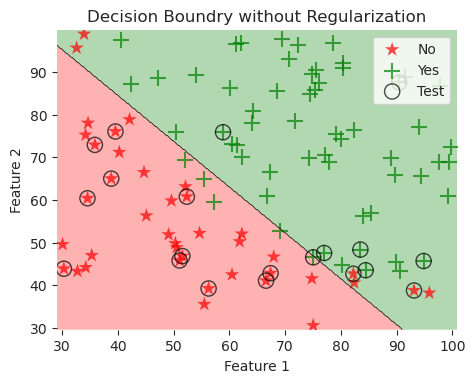

In [16]:
fig = plt.figure(dpi = 100,figsize=(4,3))
ax = fig.add_axes([1,1,1,1])

scatter_kwargs = {'s': 120, 'edgecolor': 'None', 'alpha': 0.7}
contourf_kwargs = {'alpha': 0.3}
scatter_highlight_kwargs = {'s': 120, 'alpha': 0.7,'label': 'Test Ponts'}

plot_decision_regions(X=x,
                      y=y,
                      clf=model_lr,
                      feature_index = (0,1),
                      legend=1,
                      ax = ax,
                      X_highlight=x_test,markers='*+',
                      colors='red,green',
                      scatter_kwargs=scatter_kwargs,
                      contourf_kwargs=contourf_kwargs,
                      scatter_highlight_kwargs=scatter_highlight_kwargs)

ax.set(xlabel = 'Feature 1',ylabel = 'Feature 2',
       title ='Decision Boundry without Regularization')

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, 
          ['No', 'Yes','Test'],loc = 1);

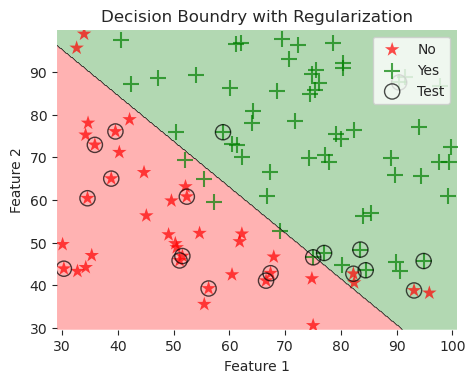

In [17]:
fig = plt.figure(dpi = 100,figsize=(4,3))
ax = fig.add_axes([1,1,1,1])

scatter_kwargs = {'s': 120, 'edgecolor': 'None', 'alpha': 0.7}
contourf_kwargs = {'alpha': 0.3}
scatter_highlight_kwargs = {'s': 120, 'alpha': 0.7,'label': 'Test Ponts'}

plot_decision_regions(X=x,
                      y=y,
                      clf=model_lr_reg,
                      feature_index = (0,1),
                      legend=1,
                      ax = ax,
                      X_highlight=x_test,markers='*+',
                      colors='red,green',
                      scatter_kwargs=scatter_kwargs,
                      contourf_kwargs=contourf_kwargs,
                      scatter_highlight_kwargs=scatter_highlight_kwargs)

ax.set(xlabel = 'Feature 1',ylabel = 'Feature 2',
       title ='Decision Boundry with Regularization')

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, 
          ['No', 'Yes','Test'],loc = 1);

## Complex Logistic Regression

1. Build Model
2. Evaluate (Accuracy)
3. Plot Decision Boundry
4. Map Features
5. Build Model
6. Evaluate
7. Plot Decision Boundry

In [18]:
df = pd.read_csv('ex2data2.txt',header=None,sep = ",")
df.columns = ['x1','x2','y']
df.head()

,x1,x2,y
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


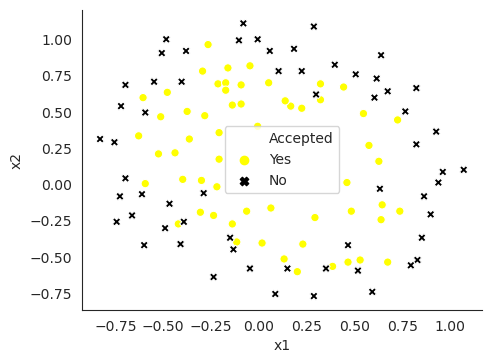

In [19]:
sns.set_style('white')
fig = plt.figure(dpi = 100,figsize=(4,3))
ax = fig.add_axes([1,1,1,1])

df_temp = df.copy()
df_temp['Accepted'] = df_temp['y'].replace({0:'No',1:'Yes'})
sns.scatterplot(x = 'x1',y='x2',hue = 'Accepted',
                data = df_temp, ax = ax,style = 'Accepted',palette=['yellow','black'])
sns.despine(right = True)
ax.legend(loc = 0);

In [20]:
x = df.iloc[:,:-1].values
y = df.iloc[:,-1].values
print(x.shape)
print(y.shape)

(118, 2)
(118,)


In [21]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.20)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(94, 2)
(94,)
(24, 2)
(24,)


In [22]:
model_lr_complex = LogisticRegression()

In [23]:
model_lr_complex.fit(x_train,y_train)

LogisticRegression()

In [24]:
model_lr_complex.score(x_train,y_train)

0.5319148936170213

In [25]:
model_lr_complex.score(x_test,y_test)

0.5

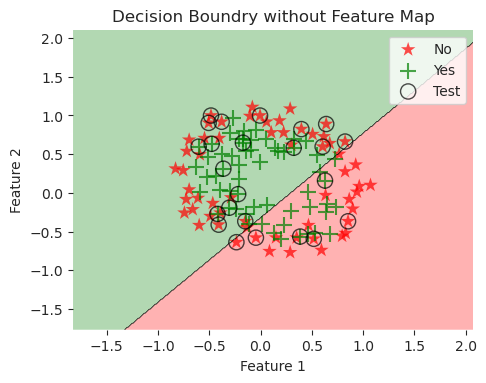

In [26]:
fig = plt.figure(dpi = 100,figsize=(4,3))
ax = fig.add_axes([1,1,1,1])

scatter_kwargs = {'s': 120, 'edgecolor': 'None', 'alpha': 0.7}
contourf_kwargs = {'alpha': 0.3}
scatter_highlight_kwargs = {'s': 120, 'alpha': 0.7,'label': 'Test Ponts'}

plot_decision_regions(X=x,
                      y=y,
                      clf=model_lr_complex,
                      legend=1,
                      ax = ax,
                      X_highlight=x_test,markers='*+',
                      colors='red,green',
                      scatter_kwargs=scatter_kwargs,
                      contourf_kwargs=contourf_kwargs,
                      scatter_highlight_kwargs=scatter_highlight_kwargs)

ax.set(xlabel = 'Feature 1',ylabel = 'Feature 2',
       title ='Decision Boundry without Feature Map')

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, 
          ['No', 'Yes','Test'],loc = 1);

### Feature Engineering

In [27]:
df['x3'] = df['x1'] ** 2
df['x4'] = df['x2'] ** 2
df['x5'] = df['x1'] * df['x2']
df.head()

,x1,x2,y,x3,x4,x5
0,0.051267,0.69956,1,0.002628,0.489384,0.035864
1,-0.092742,0.68494,1,0.008601,0.469143,-0.063523
2,-0.213710,0.69225,1,0.045672,0.479210,-0.147941
3,-0.375000,0.50219,1,0.140625,0.252195,-0.188321
4,-0.513250,0.46564,1,0.263426,0.216821,-0.238990


In [28]:
x = df[['x1','x2','x3','x4','x5']].values
y = df['y'].values
print(x.shape)
print(y.shape)

(118, 5)
(118,)


In [29]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.20)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(94, 5)
(94,)
(24, 5)
(24,)


In [30]:
model_lr_complex_fm = LogisticRegression(max_iter=1000,C = 100,penalty = 'l2')

In [31]:
model_lr_complex_fm.fit(x_train,y_train)

LogisticRegression(C=100, max_iter=1000)

In [32]:
model_lr_complex_fm.score(x_train,y_train)

0.851063829787234

In [33]:
model_lr_complex_fm.score(x_test,y_test)

0.7916666666666666

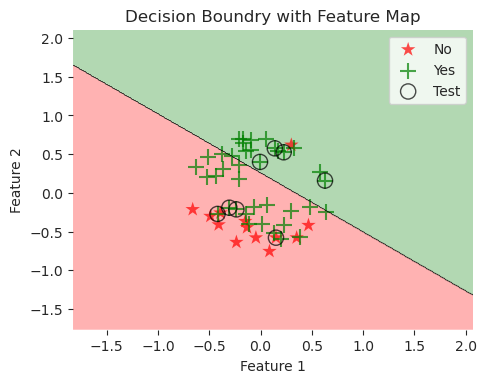

In [34]:
fig = plt.figure(dpi = 100,figsize=(4,3))
ax = fig.add_axes([1,1,1,1])

scatter_kwargs = {'s': 120, 'edgecolor': 'None', 'alpha': 0.7}
contourf_kwargs = {'alpha': 0.3}
scatter_highlight_kwargs = {'s': 120, 'alpha': 0.7,'label': 'Test Ponts'}

plot_decision_regions(X=x,
                      y=y,
                      clf=model_lr_complex_fm,
                      filler_feature_values={2: 0.24,3: 0.30,4: -0.02},
                      filler_feature_ranges={2: 0.24,3: 0.28,4: 0.22},
                      legend=1,
                      ax = ax,
                      X_highlight=x_test,markers='*+',
                      colors='red,green',
                      scatter_kwargs=scatter_kwargs,
                      contourf_kwargs=contourf_kwargs,
                      scatter_highlight_kwargs=scatter_highlight_kwargs)

ax.set(xlabel = 'Feature 1',ylabel = 'Feature 2',
       title ='Decision Boundry with Feature Map')

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, 
          ['No', 'Yes','Test'],loc = 1);